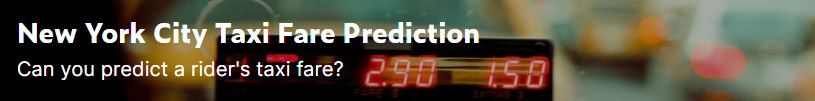

**This notebook is using the New York Taxi Fare Dataset taken from the playground competition, hosted in partnership with Google Cloud and Coursera, tasked for predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.**

**Predicted the Fare price with the help of the given data using the simple Linear Regression algorithm.**

In [87]:
import numpy as np
import pandas as pd
import plotly

import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("rainbow", 8)


import warnings
warnings.filterwarnings("ignore")

## 1. Data Exploration

<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')

In [89]:
df.shape

(50000, 8)

In [90]:
df.head(10).style.set_properties(**{'background-color': '#ffe100','color': '#000','border': '1px solid #000000'})

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.100000,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.500000,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.500000,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.000000,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.900000,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [92]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [93]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<a id="FEng"></a>
<div style="background: #ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/PjcIPM1Ba00AAAAi/tf2-tf2dance.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 2. Feature Enginnering
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

<br>
<a id="rndsample"></a>
<div style="background: #ffbf00; height:30px; width:50%; margin:0 0 -50px -10px;"></div>


**2.1 - Let get random sample of 10000**

In [94]:
rn_sample_df = df.sample(10000)

**2.2 - Seprate date, time and hour from the pickup time**

In [95]:
rn_sample_df['date_time_of_pickup'] = pd.to_datetime(rn_sample_df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

rn_sample_df['year'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.year)
rn_sample_df['weekday'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.weekday())
rn_sample_df['hour'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.hour)

In [96]:
def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [97]:
rn_sample_df['distance'] = distance(rn_sample_df.latitude_of_pickup, rn_sample_df.latitude_of_pickup, 
                                    rn_sample_df.latitude_of_dropoff, rn_sample_df.latitude_of_dropoff)

## 3. Data Cleaning
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px;"></div>
​

3.1 **Removing the coloumns with** <b><em>**null**</em></b> **values**
Lets start with removing the null values from the <b><em>rn_sample_df</em></b> sample dataset

In [98]:
rn_sample_df = rn_sample_df.dropna()

3.2  Removing the fareprice less than zero
As we have already seen that the fare price is gone below zero using the dataset description, so now remove them 

In [99]:
rn_sample_df = rn_sample_df[rn_sample_df.amount > 0]

3.3 Removing the <em><b>distance(mile)</b></em> less than zero

In [100]:
rn_sample_df = rn_sample_df[rn_sample_df.distance > 0]

3.4 Removing the <b><em>key and pickup_datetime</em></b> coloumn from the dataset
As we already got the date and time from pickup_datetime, so now there is no need of key and pickup_datetime

In [101]:
# now removing the key and pickup_datetime coloumn from the dataset
rn_sample_df = rn_sample_df.drop(['unique_id', 'date_time_of_pickup'], axis=1)

## 4. Data Visualisation
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

In [102]:
rn_sample_df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
38711,54.60,-74.008240,40.722567,-74.177923,40.690112,6,2012,2,7,2.813914
41106,4.50,-73.978620,40.750631,-73.973050,40.752703,1,2013,3,12,0.179602
14812,5.50,-73.967607,40.802810,-73.956163,40.804700,1,2014,3,16,0.163779
39916,57.33,-73.991139,40.736536,-73.789786,40.643433,1,2013,6,8,8.072941
17857,8.90,-73.991428,40.684954,-73.996892,40.711445,1,2010,6,7,2.296926


4.1 Visualize the <em><b>geospatial locations</b></em> for the <b><em>pickup</em></b> points

In [103]:
import plotly.express as px

4.1 Visualize the <em><b>geospatial locations</b></em> for the <b><em>pickup</em></b> points

In [104]:
tPickup_fig = px.scatter_mapbox(rn_sample_df, lat='latitude_of_pickup', lon='longitude_of_pickup', hover_name='amount', hover_data=['amount'],
    color='amount',color_continuous_scale=px.colors.sequential.Agsunset, opacity=.05,
    center={'lat': 40.75, 'lon': 286.051}, 
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tPickup_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tPickup_fig.show()

4.2 Visualize the <em><b>geospatial locations</b></em> for the <em><b>dropoff</b></em> points

In [105]:
tDropoff_fig = px.scatter_mapbox(rn_sample_df, lat='latitude_of_dropoff', lon='longitude_of_dropoff', hover_name='amount', hover_data=['amount'],
    color='amount',color_continuous_scale=px.colors.sequential.Rainbow_r, opacity=0.1,
    center={'lat': 40.75, 'lon': 286.051},
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tDropoff_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tDropoff_fig.show()

4.3 Histrogram plot of <b><em>fare</em></b> price

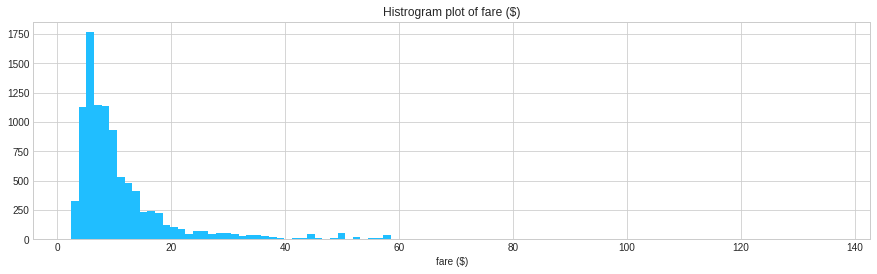

In [106]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

plt.hist(rn_sample_df['amount'], bins=100, color='#20beff')
plt.xlabel("fare ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

4.4 Barplot for visualizing the <em><b>number of rides</b></em> in the following years

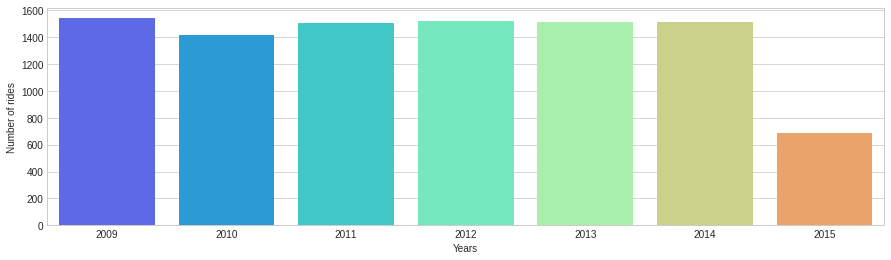

In [107]:
year_insight = rn_sample_df.year.value_counts()

plt.figure(figsize=(15, 4))
sns.barplot(data=rn_sample_df, x=year_insight.index, y=year_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()

4.4 Traffic in the <em><b>year 2012</b></em>

In [108]:
year2012_insight = rn_sample_df[rn_sample_df['year'] == 2012]

In [109]:
xlim = [-74.03, -73.85]
ylim = [40.70, 40.85]

year2012_traffic_insight = year2012_insight.copy()
year2012_insight = year2012_insight[(year2012_insight.longitude_of_pickup > xlim[0]) & (year2012_insight.longitude_of_pickup  < xlim[1])]
year2012_insight = year2012_insight[(year2012_insight.longitude_of_dropoff > xlim[0]) & (year2012_insight.longitude_of_dropoff < xlim[1])]
year2012_insight = year2012_insight[(year2012_insight.latitude_of_pickup > ylim[0]) & (year2012_insight.latitude_of_pickup < ylim[1])]
year2012_insight = year2012_insight[(year2012_insight.latitude_of_dropoff > ylim[0]) & (year2012_insight.latitude_of_dropoff < ylim[1])]

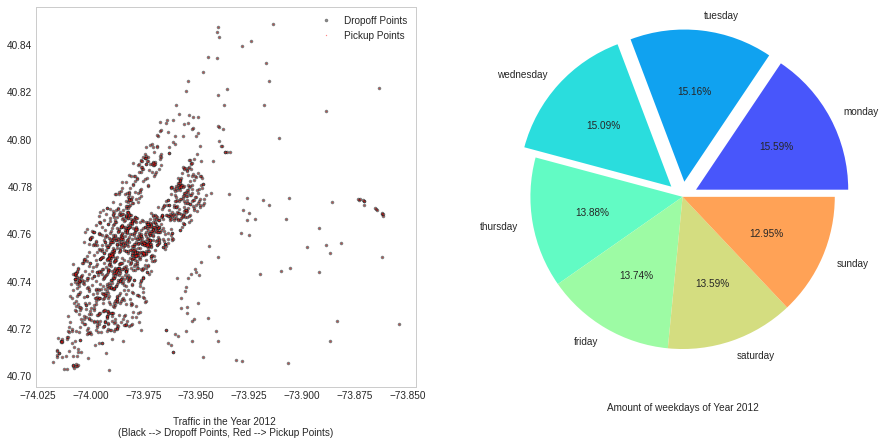

In [110]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(year2012_insight.longitude_of_dropoff, year2012_insight.latitude_of_dropoff, 'o', alpha = .5, markersize = 2, color="#fff", markeredgecolor='#000', markeredgewidth=1.5)
plt.plot(year2012_insight.longitude_of_dropoff, year2012_insight.latitude_of_dropoff, '.', alpha = .8, markersize = .5, color="red")
plt.legend(['Dropoff Points', "Pickup Points"])
plt.xlabel("\nTraffic in the Year 2012 \n(Black --> Dropoff Points, Red --> Pickup Points)")
plt.grid(False)

plt.subplot(1, 2, 2)
days_list = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
weeklyTraffic = year2012_insight['weekday'].value_counts()
plt.pie(weeklyTraffic.values, labels=days_list, autopct="%.2f%%", explode=[0.1, 0.1, 0.1, 0, 0, 0, 0], colors=palette)
plt.xlabel("\nAmount of weekdays of Year 2012")
plt.show()

In [111]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

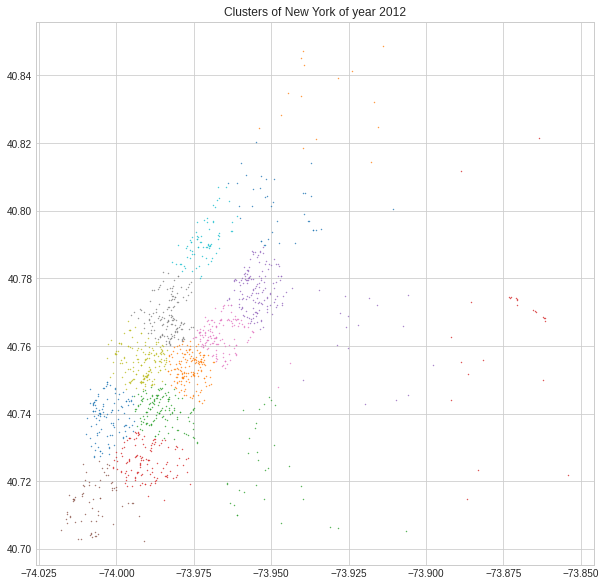

In [112]:
loc_df = pd.DataFrame()
loc_df['longitude'] = year2012_insight.longitude_of_dropoff 
loc_df['latitude'] = year2012_insight.latitude_of_dropoff


kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

plt.figure(figsize = (10, 10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 0.8)

plt.title('Clusters of New York of year 2012')
plt.show()

4.4 (b) Lets see the <em><b>peaks days</b></em> with their <em><b>rush hours</b></em> of year 2012

In [113]:
def visualize_peakDaysF(day, color='r'):
    year2012_monday_insight = year2012_insight[year2012_insight["weekday"] == day]
    day_name = list(days_list.keys())[day]
    plt.figure(figsize = (15, 70))
    
    max_pickup, max_pgcnt = 0, 0
    
    for hrs in range(24):
        specDay_traffic = year2012_monday_insight[year2012_monday_insight['hour'] == hrs]
        pickup = len(specDay_traffic)
        pgn_cnt = specDay_traffic["no_of_passenger"].sum()
        
        
        max_pickup = max(max_pickup, pickup)
        max_pgcnt = max(max_pgcnt, pgn_cnt)


        longitude = list(specDay_traffic.longitude_of_pickup) + list(specDay_traffic.longitude_of_dropoff )
        latitude = list(specDay_traffic.latitude_of_pickup) + list(specDay_traffic.latitude_of_dropoff)
        plt.subplot(24, 6, hrs+1)

        plt.title("\nHour: " + str(hrs) + " [pickup="+ str(pickup)+",\npassengers count="+ str(pgn_cnt)+"] ", fontsize=12)

        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.plot(longitude,latitude,'.', alpha = 0.6, markersize = 10, color=color)

#         break
    plt.suptitle("\n"+ day_name.capitalize() +" (max pickups=" + str(max_pickup) + ", max passengers=" + str(max_pgcnt) + ")\n\n\n\n\n\n", fontsize=20)
    plt.tight_layout()
    plt.show()

4.4 (b1) Visualize the rush hours for <b><em>monday</em></b>

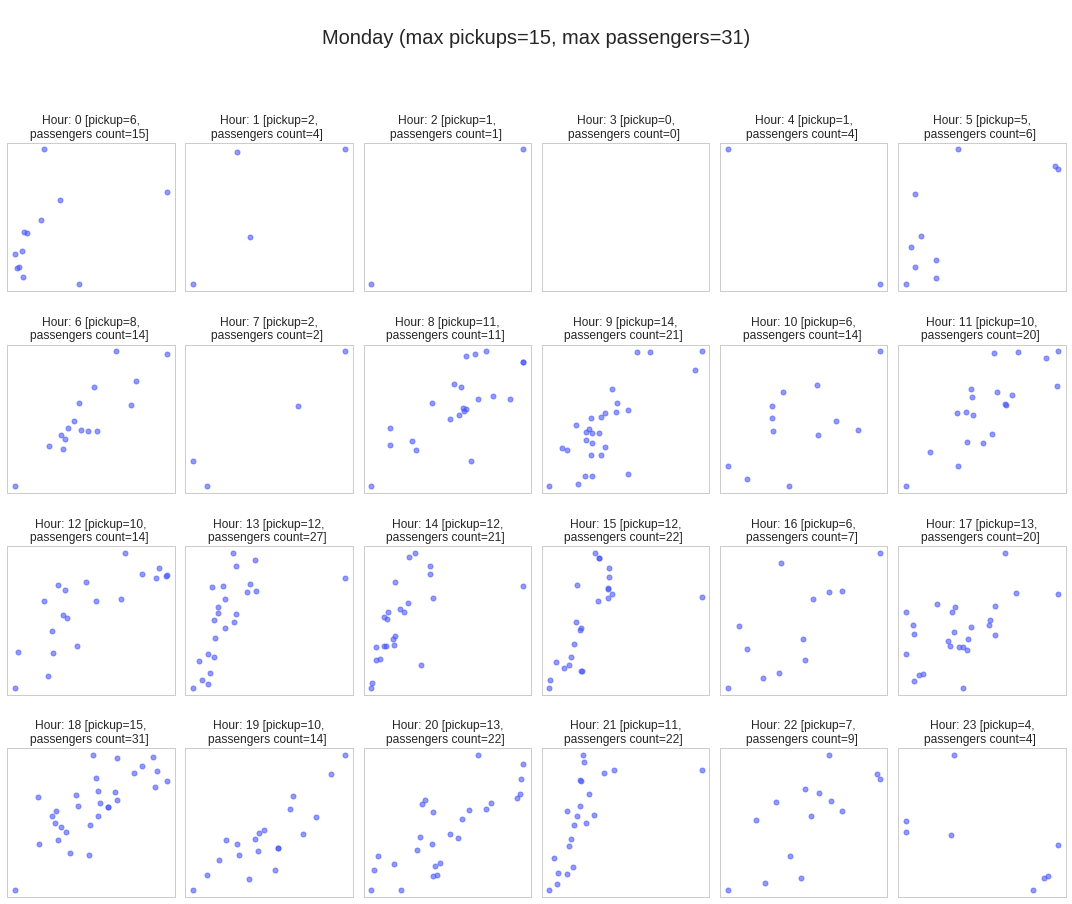

In [114]:
visualize_peakDaysF(0, color='#4856fb')

4.4 (b2) Visualize the rush hours for <b><em>Tuesday</em></b>

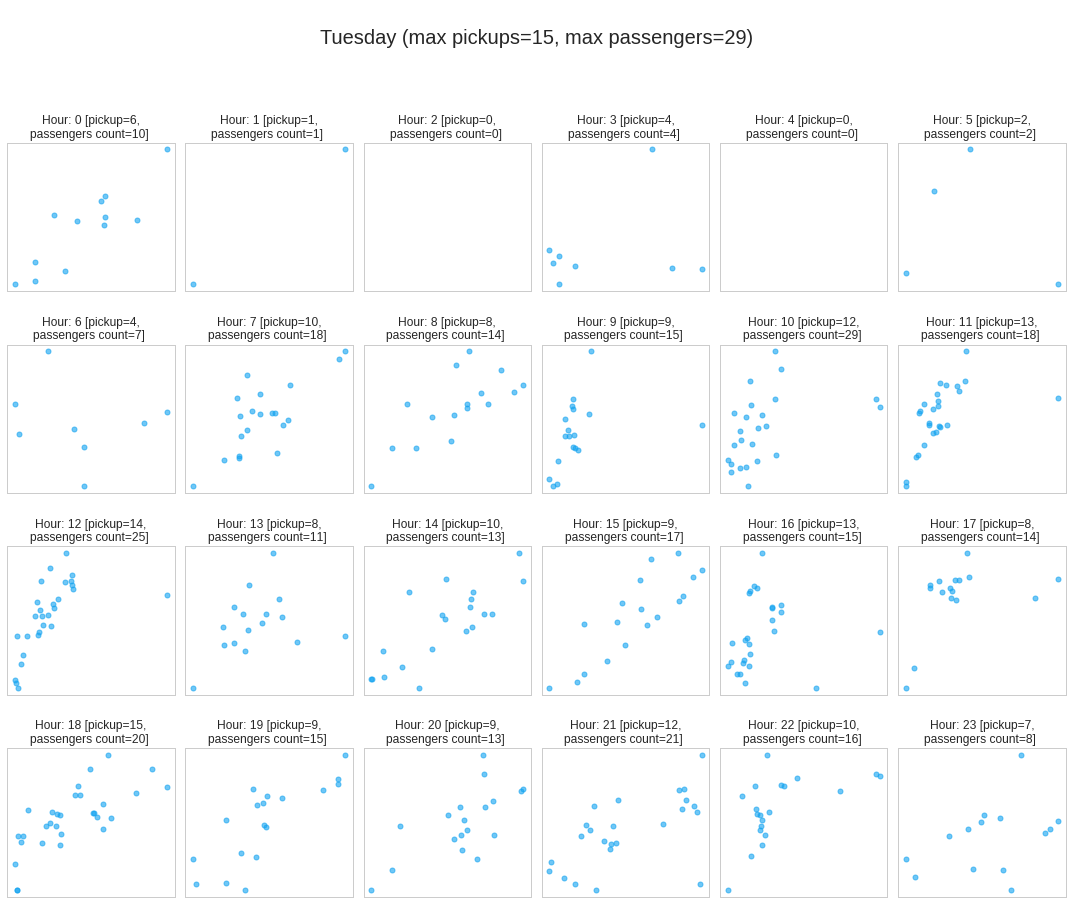

In [115]:
visualize_peakDaysF(1, color='#10a2f0')

4.4 (b2) Visualize the rush hours for <b><em>Sunday</em></b>

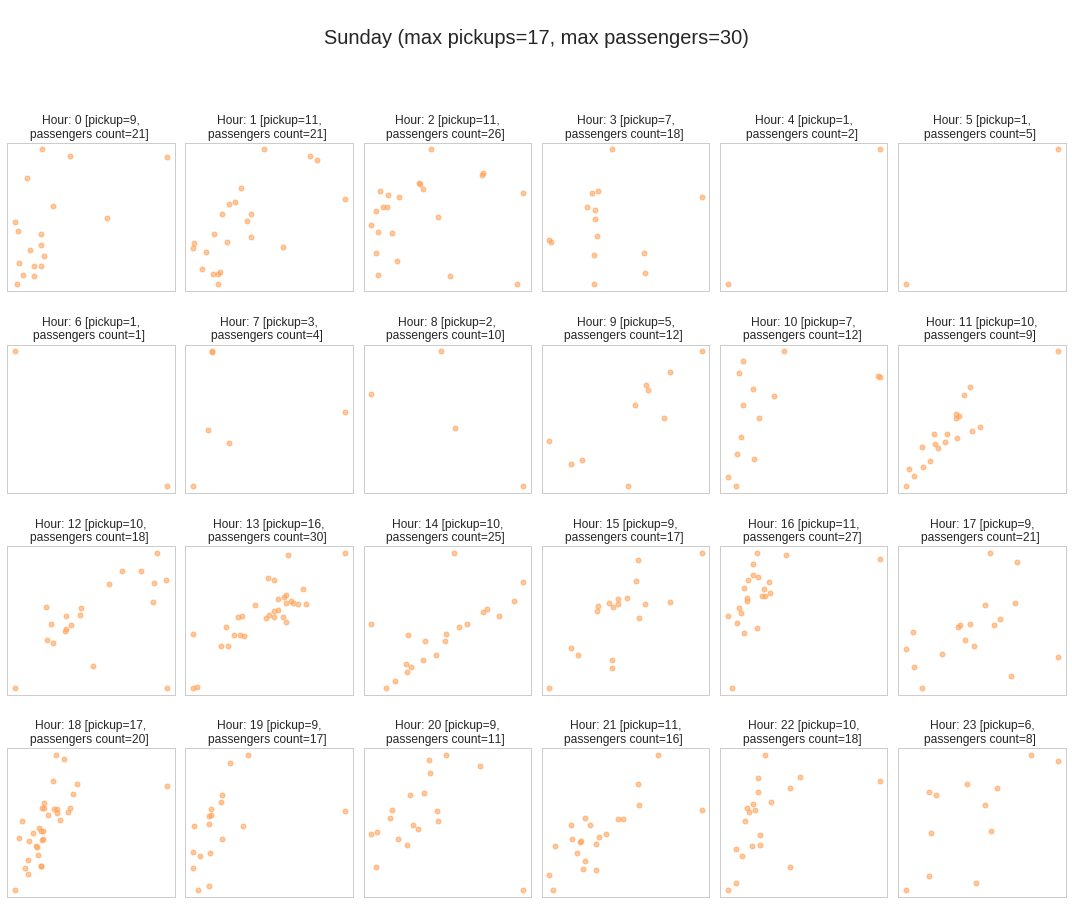

In [116]:
visualize_peakDaysF(6, color='#ffa256')

4.4 (c)\ Histrogram plot for the <b><em>distances(mile)</em></b> travelled
This histrogram gives us a veiw that most of the ride taken was a short ride

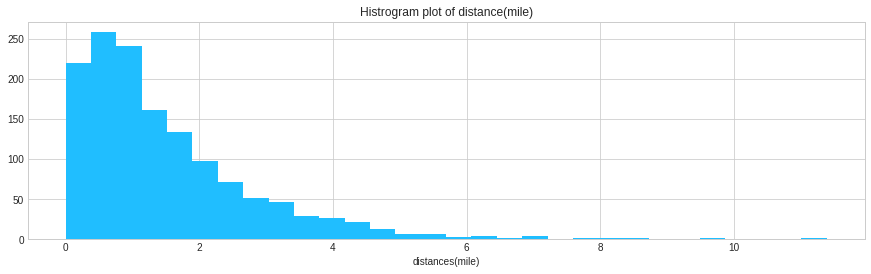

In [117]:
year2012_insight.distance.hist(bins=30, figsize=(15,4), color='#20beff')
plt.xlabel("distances(mile)")
plt.title("Histrogram plot of distance(mile)")
plt.show()

In [118]:
year2012_insight.groupby('no_of_passenger')['distance', 'amount'].mean()

,distance,amount
no_of_passenger,,
0,1.551639,7.966667
1,1.474929,9.503267
2,1.516874,10.268778
3,1.353581,9.685965
4,1.656256,9.672222
5,1.625420,9.237500
6,2.056155,13.115385


In [119]:
print("Average $USD/Mile : {:0.2f}".format(year2012_insight.amount.sum()/year2012_insight.distance.sum()))

Average $USD/Mile : 6.44


4.4 (d) Scatter plot visualization between <em><b>Fare(in $USD)</b></em> vs  <em><b>Distance(in Miles)</b></em> of year 2012

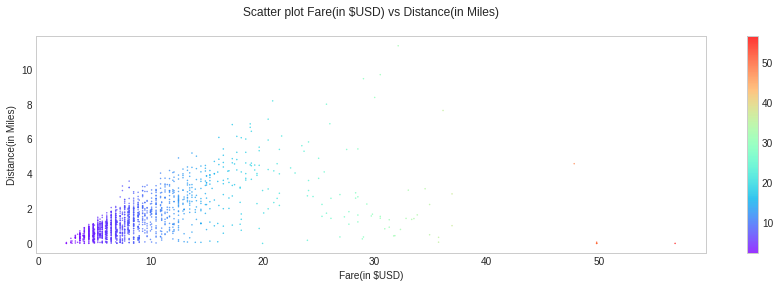

In [120]:
plt.figure(figsize=(15,4))

plt.scatter(year2012_insight.amount, year2012_insight.distance, c=year2012_insight.amount, 
            cmap=plt.cm.rainbow, alpha=0.8, s=1, marker=".")
plt.xlabel("Fare(in $USD)")
plt.ylabel("Distance(in Miles)")
plt.title("Scatter plot Fare(in $USD) vs Distance(in Miles)\n")
ol = plt.grid(False)
plt.colorbar(ol)
plt.show()

By seeing this data we can sumarize:

1. There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.

2. Overall there seems to be a (linear) relation between distance and fare.

3. Initial charge for most rides is $2.50 upon entry

4. And it also seems that someone has paid way too much (>120$)

In [121]:
# remove datapoints with distance < 0.05 miles

print("Old size: ", len(year2012_insight))
train_df = year2012_insight[year2012_insight.distance >= 0.05]

print("New size: ", len(train_df))

Old size:  1405
New size:  1374


## 5. Model (for the year 2012 only)
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>
<em><b>Due too the large volume of dataset this notebook was constantly crashing, so in here we are only gonna use the data of year 2012 </b></em>

5.1 Generate the <em><b>test</b></em> data

In [122]:
model_data = train_df[['year', 'hour', 'distance', 'no_of_passenger', 'amount']]

In [123]:
model_data.head()

,year,hour,distance,no_of_passenger,amount
14982,2012,19,1.790175,3,8.0
48756,2012,8,0.339785,2,6.1
42839,2012,20,0.548093,2,4.5
28027,2012,12,0.420242,2,5.5
16728,2012,18,1.962366,1,13.0


5.2 Train, test split of the datasets

In [124]:
X = model_data[['year', 'hour', 'distance', 'no_of_passenger']]
y = model_data[['amount']]

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

5.3 Model Run

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

5.4 Model Score

In [127]:
from sklearn.metrics import r2_score

y_test_pred = model_lin.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 34.0%
